# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="



city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
index_counter = 0
set_counter = 1

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Processing Record 1 of Set 1 : alofi
Processing Record 2 of Set 1 : kapaa
Processing Record 3 of Set 1 : faanui
Processing Record 4 of Set 1 : nikolskoye
Processing Record 5 of Set 1 : hithadhoo
Processing Record 6 of Set 1 : bluff
Processing Record 7 of Set 1 : rikitea
Processing Record 8 of Set 1 : severo-kurilsk
Processing Record 9 of Set 1 : bethel
Processing Record 10 of Set 1 : longyearbyen
City not found. Skipping...
Processing Record 11 of Set 1 : dikson
Processing Record 12 of Set 1 : santona
Processing Record 13 of Set 1 : bredasdorp
Processing Record 14 of Set 1 : qaanaaq
Processing Record 15 of Set 1 : sao filipe
Processing Record 16 of Set 1 : kiunga
Processing Record 17 of Set 1 : provideniya
Processing Record 18 of Set 1 : port hawkesbury
Processing Record 19 of Set 1 : stokmarknes
Processing Record 20 of Set 1 : puerto ayora
Processing Record 21 of Set 1 : halifax
Processing Record 22 of Set 1 : punta arenas
City not found. Skipping...
Processing Record 23 of Set 1 : ma

Processing Record 39 of Set 4 : deputatskiy
Processing Record 40 of Set 4 : vila do maio
Processing Record 41 of Set 4 : shitanjing
Processing Record 42 of Set 4 : alugan
Processing Record 43 of Set 4 : camacha
Processing Record 44 of Set 4 : nago
Processing Record 45 of Set 4 : mabaruma
Processing Record 46 of Set 4 : fort nelson
Processing Record 47 of Set 4 : bara
Processing Record 48 of Set 4 : lucea
Processing Record 49 of Set 4 : tezu
City not found. Skipping...
Processing Record 50 of Set 4 : tonota
Processing Record 0 of Set 5 : mount gambier
City not found. Skipping...
Processing Record 1 of Set 5 : bani
Processing Record 2 of Set 5 : richards bay
Processing Record 3 of Set 5 : tilichiki
Processing Record 4 of Set 5 : yerofey pavlovich
Processing Record 5 of Set 5 : bengkulu
Processing Record 6 of Set 5 : broome
Processing Record 7 of Set 5 : sakaiminato
Processing Record 8 of Set 5 : tessalit
Processing Record 9 of Set 5 : joshimath
Processing Record 10 of Set 5 : egvekinot
P

Processing Record 25 of Set 8 : comodoro rivadavia
City not found. Skipping...
Processing Record 26 of Set 8 : muhos
Processing Record 27 of Set 8 : terney
Processing Record 28 of Set 8 : kargil
Processing Record 29 of Set 8 : santa isabel do rio negro
Processing Record 30 of Set 8 : iskateley
Processing Record 31 of Set 8 : praya
Processing Record 32 of Set 8 : hays
Processing Record 33 of Set 8 : flinders
Processing Record 34 of Set 8 : sitka
Processing Record 35 of Set 8 : kalmunai
Processing Record 36 of Set 8 : progreso
City not found. Skipping...
Processing Record 37 of Set 8 : husavik
Processing Record 38 of Set 8 : sibu
City not found. Skipping...
Processing Record 39 of Set 8 : kalaleh
Processing Record 40 of Set 8 : esna
Processing Record 41 of Set 8 : ilulissat
Processing Record 42 of Set 8 : oranjemund
Processing Record 43 of Set 8 : saint george
City not found. Skipping...
Processing Record 44 of Set 8 : ust-tsilma
Processing Record 45 of Set 8 : coahuayana
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:

weather = pd.DataFrame({ 
                "City" : city_name,
                "Cloudiness" : cloudiness,
                "Country" : country,
                "Date" : date,
                "Humidity" : humidity,
                "Lat" : lat,
                "Lng" : lng,
                "Max Temp" : max_temp,
                "Wind Speed" : wind_speed
})

In [7]:

clean_weather = {"Lat": lat, "Lng": lng, "Max Temp": max_temp, "Humidity": humidity, "Cloudiness": cloudiness, "Wind Speed": wind_speed, "Date": date}
clean_weather_data = pd.DataFrame(clean_weather)

#Export City Data into csv file
clean_weather_data.to_csv("weatherpy.csv", index = False)

#Disply dataframe
clean_weather_data.head()
clean_weather_data

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,-19.0595,-169.9187,23.00,94,57,0.51,1619281244
1,22.0752,-159.3190,23.00,73,75,7.72,1619281244
2,-16.4833,-151.7500,26.61,74,100,3.67,1619281244
3,59.7035,30.7861,6.67,61,20,2.00,1619281245
4,-0.6000,73.0833,28.69,69,46,2.66,1619281245
...,...,...,...,...,...,...,...
544,-9.0122,-35.2225,28.80,67,3,4.13,1619281383
545,59.2353,163.0719,-1.15,98,100,1.47,1619281384
546,48.4001,-89.3168,1.11,74,90,4.12,1619281381
547,54.8097,105.1578,1.13,99,100,1.03,1619281384


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
clean_weather_data.count()

Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Date          549
dtype: int64

In [9]:
clean_weather_data.max()

Lat           7.821860e+01
Lng           1.784167e+02
Max Temp      4.269000e+01
Humidity      1.000000e+02
Cloudiness    1.000000e+02
Wind Speed    1.249000e+01
Date          1.619281e+09
dtype: float64

In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

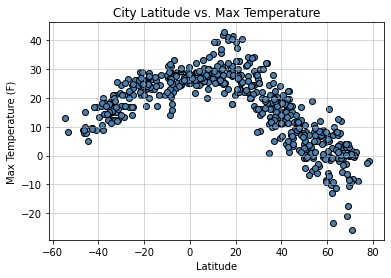

In [11]:
plt.scatter(clean_weather_data["Lat"], clean_weather_data["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

## Latitude vs. Humidity Plot

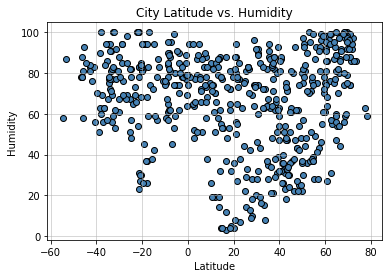

In [12]:
plt.scatter(clean_weather_data["Lat"], clean_weather_data["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Humidity")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

## Latitude vs. Cloudiness Plot

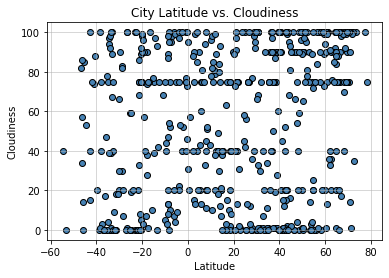

In [13]:

plt.scatter(clean_weather_data["Lat"], clean_weather_data["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Cloudiness")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

## Latitude vs. Wind Speed Plot

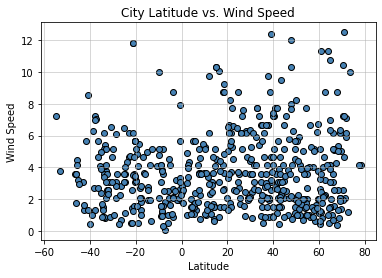

In [14]:
plt.scatter(clean_weather_data["Lat"], clean_weather_data["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Wind Speed")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Wind Speed")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

## Linear Regression

In [16]:
northhem_df = clean_weather_data[clean_weather_data['Lat'] >= 0]
northhem_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
1,22.0752,-159.3190,23.00,73,75,7.72,1619281244
3,59.7035,30.7861,6.67,61,20,2.00,1619281245
7,50.6789,156.1250,1.71,94,100,2.27,1619281246
8,41.3712,-73.4140,19.44,26,1,3.60,1619281129
9,78.2186,15.6401,-2.00,59,75,4.12,1619281246
...,...,...,...,...,...,...,...
542,43.7767,20.2253,17.00,34,0,3.09,1619281383
543,37.1717,119.9214,10.10,85,50,2.85,1619281383
545,59.2353,163.0719,-1.15,98,100,1.47,1619281384
546,48.4001,-89.3168,1.11,74,90,4.12,1619281381


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7525663021788112


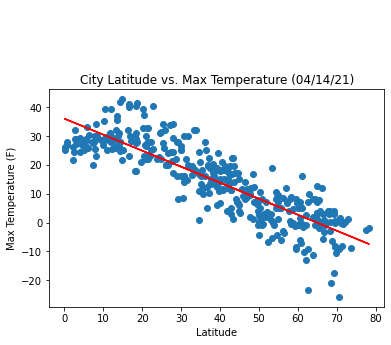

In [18]:
x_values = northhem_df['Lat']
y_values = northhem_df['Max Temp']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Max Temperature (04/14/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot Linear regression
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(26,72),fontsize=10,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [19]:

southhem_df = clean_weather_data[clean_weather_data['Lat'] < 0]
southhem_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,-19.0595,-169.9187,23.00,94,57,0.51,1619281244
2,-16.4833,-151.7500,26.61,74,100,3.67,1619281244
4,-0.6000,73.0833,28.69,69,46,2.66,1619281245
5,-46.6000,168.3333,8.89,78,82,3.58,1619281245
6,-23.1203,-134.9692,25.48,73,100,6.15,1619281246
...,...,...,...,...,...,...,...
534,-8.7676,160.7034,25.37,85,87,1.56,1619281381
535,-0.6136,-47.3561,28.22,79,100,3.07,1619281260
538,-2.6500,10.0000,26.30,83,100,2.53,1619281382
544,-9.0122,-35.2225,28.80,67,3,4.13,1619281383


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.04121481732652815


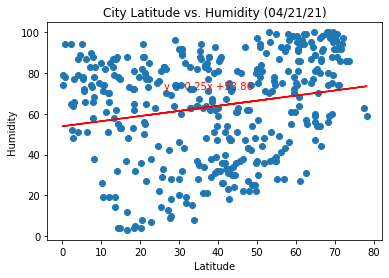

In [20]:
x_values = northhem_df['Lat']
y_values = northhem_df['Humidity']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Humidity (04/21/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot Linear regression
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(26,72),fontsize=10,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.001199450140655012


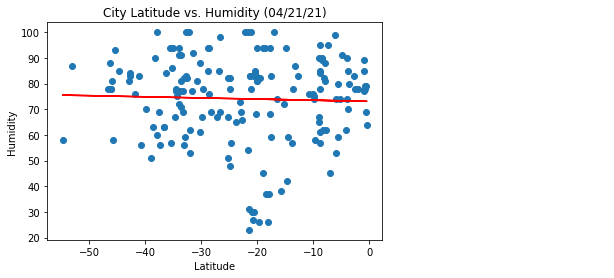

In [21]:
x_values = southhem_df['Lat']
y_values = southhem_df['Humidity']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Humidity (04/21/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot Linear regression
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(26,72),fontsize=10,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#Show plot
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.05335626060306791


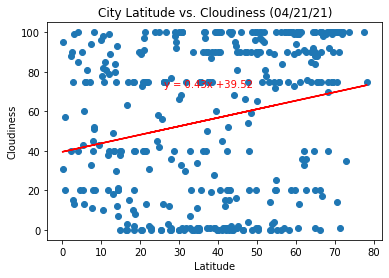

In [22]:
x_values = northhem_df['Lat']
y_values = northhem_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Cloudiness (04/21/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot Linear regression
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(26,72),fontsize=10,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#Show plot
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.03130843985741087


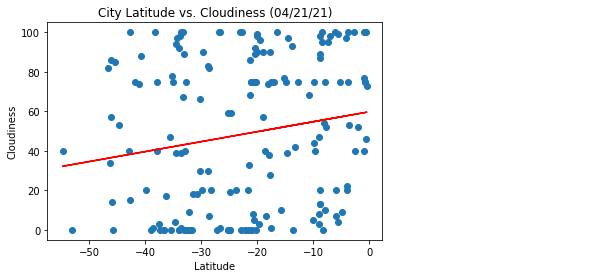

In [23]:
x_values = southhem_df['Lat']
y_values = southhem_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Cloudiness (04/21/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot Linear regression
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(26,72),fontsize=10,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0009996505692392143


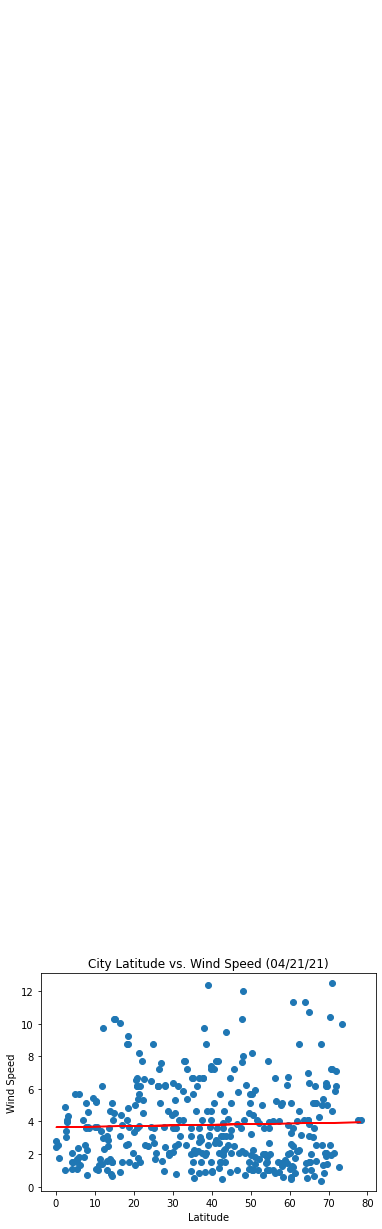

In [26]:
x_values = northhem_df['Lat']
y_values = northhem_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Wind Speed (04/21/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot Linear regression
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(26,72),fontsize=10,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#Show plot
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.01459874874215593


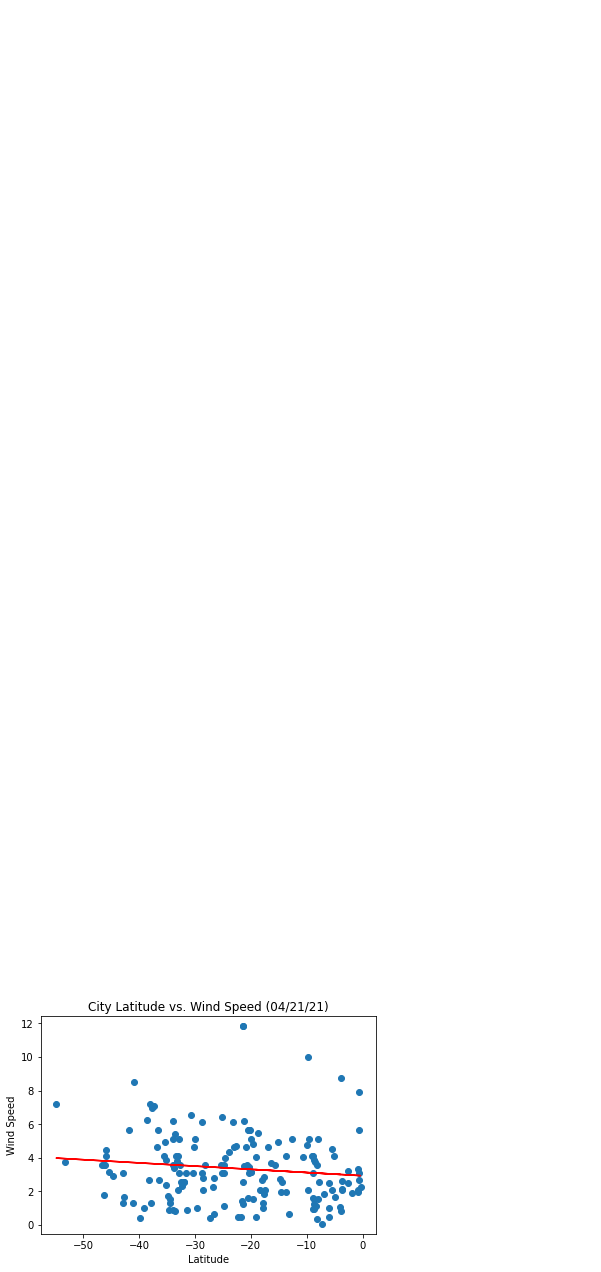

In [27]:
x_values = southhem_df['Lat']
y_values = southhem_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Wind Speed (04/21/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot Linear regression
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(26,72),fontsize=10,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#Show plot
plt.show()